In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [21]:
lows_a2a = []
highs_a2a = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a.extend(df[:10_000]["fr_0"])
    highs_a2a.extend(df[-10_000:]["fr_0"])
    cnx.close()
    
lows_a2a_p = []
highs_a2a_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a_p.extend(df[:10_000]["pref_0"])
    highs_a2a_p.extend(df[-10_000:]["pref_0"])
    cnx.close()
    
lows_a1 = []
highs_a1 = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1.extend(df[:10_000]["fr_1"])
    highs_a1.extend(df[-10_000:]["fr_1"])
    cnx.close()
    
lows_a1_p = []
highs_a1_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a1_p.extend(df[:10_000]["pref_1"])
    highs_a1_p.extend(df[-10_000:]["pref_1"])
    cnx.close()
    
lows_herg = []
highs_herg = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg.extend(df[:10_000]["fr_2"])
    highs_herg.extend(df[-10_000:]["fr_2"])
    cnx.close()
    
lows_herg_p = []
highs_herg_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_herg_p.extend(df[:10_000]["pref_2"])
    highs_herg_p.extend(df[-10_000:]["pref_2"])
    cnx.close()

In [30]:
a = pd.DataFrame(pd.Series(lows_a2a), columns=["A2A"])
b = pd.DataFrame(pd.Series(lows_a1), columns=["A1"])
c = pd.DataFrame(pd.Series(lows_herg), columns=["hERG"])
d = pd.concat([a, b, c], axis=1)
e = pd.DataFrame(pd.Series(highs_a2a), columns=["A2A"])
f = pd.DataFrame(pd.Series(highs_a1), columns=["A1"])
g = pd.DataFrame(pd.Series(highs_herg), columns=["hERG"])
h = pd.concat([e, f, g], axis=1)
i = pd.concat([d, h], axis=0)
i.reset_index(inplace=True)
i["index"].iloc[0:80_000] = "First 80K"
i["index"].iloc[-80_000:] = "Last 80K"
i.rename(columns={"index":"samples"}, inplace=True)

/tmp/ipykernel_192601/1196994486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["index"].iloc[0:80_000] = "First 80K"


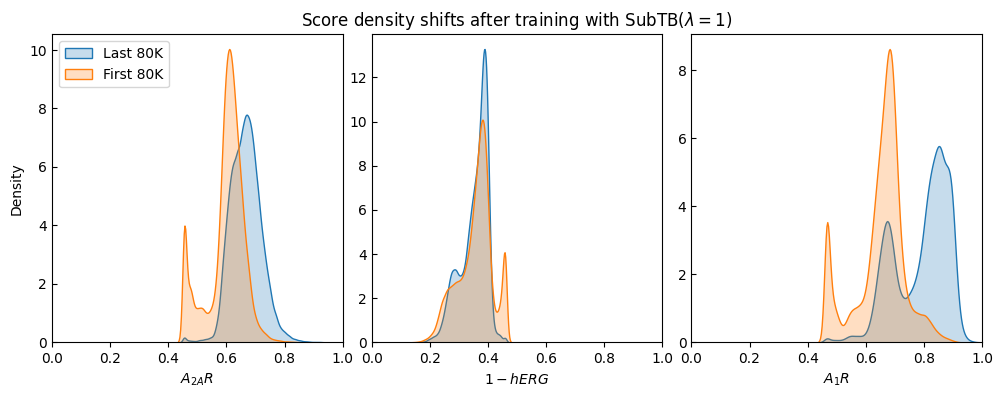

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.kdeplot(i[i.samples ==  "Last 80K"]["A2A"], fill=True, ax=ax1, label="Last 80K")
sns.kdeplot(i[i.samples ==  "First 80K"]["A2A"], fill=True, ax=ax1, label="First 80K")
ax1.legend(loc="upper left")
ax1.set_xlabel("$A_{2A}R$")
ax1.set_xlim([0, 1])
ax1.tick_params(direction="in", axis="y")
sns.kdeplot(i[i.samples ==  "Last 80K"]["hERG"], fill=True, ax=ax2)
sns.kdeplot(i[i.samples ==  "First 80K"]["hERG"], fill=True, ax=ax2)
ax2.set_xlabel("$1-hERG$")
ax2.set_title("Score density shifts after training with SubTB($\lambda=1$)")
ax2.set_xlim([0, 1])
ax2.set_ylabel("")
ax2.tick_params(direction="in", axis="y")
sns.kdeplot(i[i.samples ==  "Last 80K"]["A1"], fill=True, ax=ax3)
sns.kdeplot(i[i.samples ==  "First 80K"]["A1"], fill=True, ax=ax3)
ax3.set_xlabel("$A_{1}R$")
ax3.set_ylabel("")
ax3.tick_params(direction="in", axis="y")
ax3.set_xlim([0, 1])
fig.subplots_adjust(wspace=0.1)

In [116]:
fig.savefig("../reports/drugex_v2_beta_96_sub_trajectory_balance_5000.png")

In [141]:
pareto = torch.load("../logs/mogfn/drugex_v2_subtb_beta_96_lr_5e-4/pareto.pt")
pf = pareto["pareto_front"]

In [173]:
pareto_tb = torch.load("../logs/mogfn/drugex_v2_tb_beta_96/pareto.pt")
pf_tb = pareto_tb["pareto_front"]

In [197]:
pareto_tb5 = torch.load("../logs/mogfn/drugex_v2_tb_beta_96_lr_5e-4/pareto.pt")
pf_tb5 = pareto_tb5["pareto_front"]

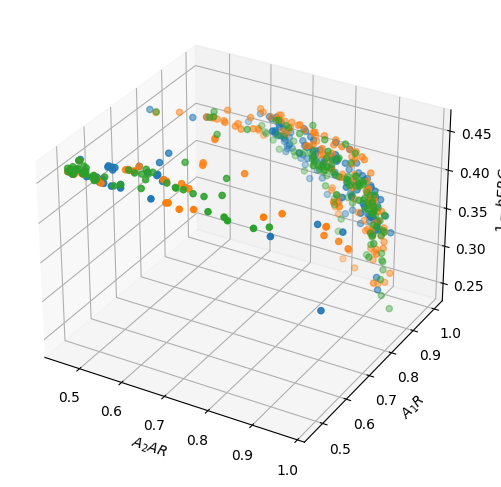

In [200]:
from matplotlib import cm

plt.close()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("$A_{2}AR$")
ax.set_ylabel("$A_{1}R$")
ax.set_zlabel("$1-hERG$")

df = pd.DataFrame({'x': pf_tb[:,0], 'y': pf_tb[:,1], 'z': pf_tb[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="orange")
scatter = ax.scatter3D(df.x, df.y, df.z)
df = pd.DataFrame({'x': pf[:,0], 'y': pf[:,1], 'z': pf[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="blue")
scatter = ax.scatter3D(df.x, df.y, df.z)
# fig.colorbar(surf, shrink=0.4, aspect=5, location="left")    
# plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
df = pd.DataFrame({'x': pf_tb5[:,0], 'y': pf_tb5[:,1], 'z': pf_tb5[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1, antialiased=True, edgecolor="grey", color="pink")
scatter = ax.scatter3D(df.x, df.y, df.z)
plt.show()

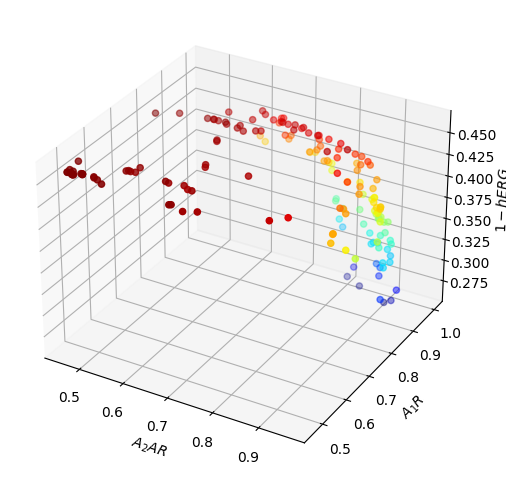

In [172]:
from matplotlib import cm

plt.close()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("$A_{2}AR$")
ax.set_ylabel("$A_{1}R$")
ax.set_zlabel("$1-hERG$")

df = pd.DataFrame({'x': pf[:,0], 'y': pf[:,1], 'z': pf[:,2]})
# surf = ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.1, antialiased=True, edgecolor="grey")
scatter = ax.scatter3D(df.x, df.y, df.z, c=df.z, cmap=cm.jet)
# fig.colorbar(surf, shrink=0.4, aspect=5, location="left")    
# plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
plt.show()